In [ ]:
from model import Net
import torch

HIDDEN_SIZE = 100
HIDDEN_COUNT = 2

net = Net(20, HIDDEN_SIZE, HIDDEN_COUNT, 2)
net.load_state_dict(torch.load("./models/model.pth"))

import shap
shap.initjs()

In [43]:
import pandas as pd
data = pd.read_csv("./data/divorce_data.csv", sep=";")
data = data.drop(data.columns[20:54], axis=1)

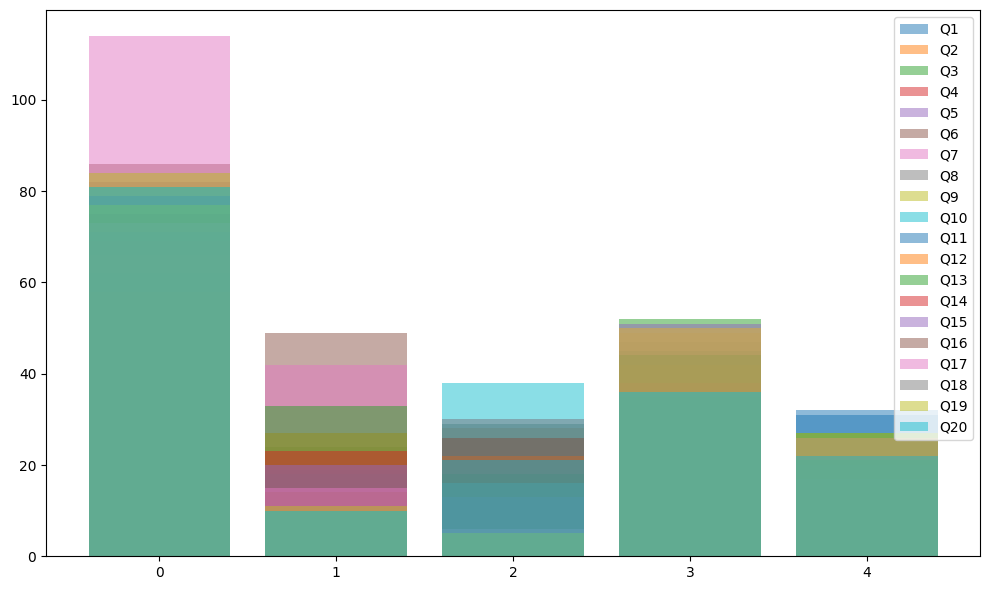

In [47]:
import matplotlib.pyplot as plt

# count the number of occurrences of each answer for each question
counts = {}
for col in data.columns[:-1]:
    counts[col] = data[col].value_counts()

# plot the counts for each question on a single set of axes
fig, ax = plt.subplots(figsize=(10, 6))
for col, count in counts.items():
    ax.bar(count.index, count.values, alpha=0.5, label=col)
ax.legend()
plt.tight_layout()
plt.show()

In [51]:
explainer = shap.Explainer(net, masker=shap.maskers.Independent(data))
shap_values = explainer(torch.tensor(data.values).float())

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mnon-precise type pyobject[0m
[0m[1mDuring: typing of argument at c:\Users\Wessel van Gils\Documents\Documents\School\Year 4\Human Centric\Python-Backend-HCD\env\Lib\site-packages\shap\maskers\_tabular.py (198)[0m
[1m
File "env\Lib\site-packages\shap\maskers\_tabular.py", line 198:[0m
[1mdef _single_delta_mask(dind, masked_inputs, last_mask, data, x, noop_code):
    <source elided>

[1m@njit
[0m[1m^[0m[0m 

This error may have been caused by the following argument(s):
- argument 1: [1mCannot determine Numba type of <class 'torch.Tensor'>[0m
